In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2
nba_data_master = pd.read_csv('nba_data_master.csv')

In [98]:
nba_data_master = nba_data_master[(nba_data_master['season_start'] >= 2007) & (nba_data_master['salary'] > 1000000)]
nba_data_master

,stage,team,player_key,league,salary,season,season_end,season_start,team.1,name,position,points_per_game,rebounds_per_game,assists_per_game,blocks_per_game,steals_per_game,turnovers_per_game,player_utility,player_value
1080,Playoffs,LAL,Kobe Bryant (2007 - 2008),NBA,19490625,2007 - 2008,2008,2007,Los Angeles Lakers,Kobe Bryant,SF,30.142857,5.666667,5.571429,0.380952,1.666667,3.333333,46.061905,2.363285
1081,Playoffs,BOS,Kevin Garnett (2007 - 2008),NBA,23750000,2007 - 2008,2008,2007,Boston Celtics,Kevin Garnett,PF,20.384615,10.538462,3.346154,1.115385,1.346154,2.115385,40.857692,1.720324
1082,Playoffs,BOS,Paul Pierce (2007 - 2008),NBA,16360094,2007 - 2008,2008,2007,Boston Celtics,Paul Pierce,SF,19.653846,4.961538,4.576923,0.307692,1.076923,3.153846,32.088462,1.961386
1083,Playoffs,BOS,Ray Allen (2007 - 2008),NBA,16000000,2007 - 2008,2008,2007,Boston Celtics,Ray Allen,SG,15.576923,3.769231,2.730769,0.307692,0.923077,1.461538,25.196154,1.574760
1084,Playoffs,SAS,Tony Parker (2007 - 2008),NBA,10500000,2007 - 2008,2008,2007,San Antonio Spurs,Tony Parker,PG,22.411765,3.705882,6.058824,0.058824,0.941176,2.941176,35.005882,3.333894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,Playoffs,MIA,Bam Adebayo (2017 - 2018),NBA,2490360,2017 - 2018,2018,2017,Miami Heat,Bam Adebayo,C,3.400000,4.000000,0.000000,0.400000,0.000000,0.400000,8.600000,3.453316
2687,Playoffs,SAS,Davis Bertans (2017 - 2018),NBA,1312611,2017 - 2018,2018,2017,San Antonio Spurs,Davis Bertans,PF,3.400000,2.200000,1.200000,0.000000,0.400000,0.200000,8.440000,6.429932
2688,Playoffs,CLE,Cedi Osman (2017 - 2018),NBA,2642857,2017 - 2018,2018,2017,Cleveland Cavaliers,Cedi Osman,None,1.000000,0.500000,0.214286,0.000000,0.214286,0.000000,2.350000,0.889189
2689,Playoffs,POR,Ed Davis (2017 - 2018),NBA,6352531,2017 - 2018,2018,2017,Portland Trail Blazers,Ed Davis,PF,2.750000,8.000000,0.000000,0.250000,0.000000,1.000000,11.850000,1.865398


In [135]:
def find_outlier(position):
    players = nba_data_master[(nba_data_master['position'] == position)]
    n = len(players['player_value'])
    mu = np.mean(players['player_value'])
    sigma = np.std(players['player_value'])
    c_interval = stats.norm.interval(alpha=0.999999, loc=mu, scale=sigma/np.sqrt(n))
    sns.displot(data=players, x="player_value", bins=[0 + 1 * i for i in range(50)])

    print(' Position: {} \n Mean: {} \n Standard Deviation: {} \n n: {}'.format(position, mu, sigma, n))
    print(c_interval)
    
    overvalued_players = players[(players['player_value'] < c_interval[0])]['player_key']
    undervalued_players = players[(players['player_value'] > c_interval[1])]['player_key']
#     print('Overvalued Players: {}'.format(overvalued_players))
#     print('Undervalued Players: {}'.format(undervalued_players))   
    return overvalued_players, undervalued_players

 Position: PG 
 Mean: 5.919354130564694 
 Standard Deviation: 5.104683159656295 
 n: 299
(4.47528644612367, 7.36342181499927)


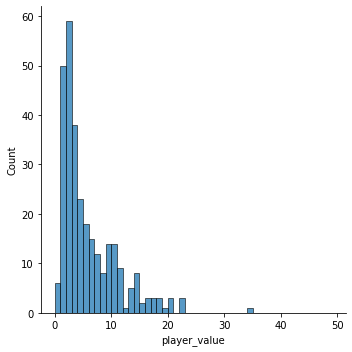

In [136]:
overvalued, undervalued = find_outlier('PG')

In [138]:
pd.DataFrame(overvalued)

,player_key
1084,Tony Parker (2007 - 2008)
1134,Allen Iverson (2007 - 2008)
1138,Sam Cassell (2007 - 2008)
1139,Andre Miller (2007 - 2008)
1148,Steve Nash (2007 - 2008)
...,...
2630,Jeff Teague (2017 - 2018)
2645,Dante Exum (2017 - 2018)
2657,Tyler Johnson (2017 - 2018)
2665,Tony Parker (2017 - 2018)


In [139]:
pd.DataFrame(undervalued)

,player_key
1091,Chris Paul (2007 - 2008)
1092,Rajon Rondo (2007 - 2008)
1093,Deron Williams (2007 - 2008)
1111,Jameer Nelson (2007 - 2008)
1114,Delonte West (2007 - 2008)
...,...
2621,Derrick Rose (2017 - 2018)
2640,T.J. McConnell (2017 - 2018)
2656,Fred VanVleet (2017 - 2018)
2658,Dejounte Murray (2017 - 2018)
